#### Gerekli kütüphaneleri import ederek dosyayı okuyoruz.

In [1]:
import matplotlib.pyplot as plt
from scipy.stats.stats import ttest_ind
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import warnings
from scipy.stats.mstats import winsorize

warnings.filterwarnings('ignore')

In [2]:
play=pd.read_csv("googleplaystore.csv")

In [3]:
play.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


Verimi incelemeye başlıyorum.

In [4]:
play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


Verisetindeki null değerleri inceleyelim.

In [5]:
def null_degerler(play):
    null_play=pd.DataFrame()
    null_play['yüzde']=play.isnull().sum()*100/play.shape[0]
    null_play['adet']=play.isnull().sum()
    return null_play.sort_values('yüzde',ascending=False)
null_degerler(play)

,yüzde,adet
Rating,13.596532,1474
Current Ver,0.073794,8
Android Ver,0.027673,3
Type,0.009224,1
Content Rating,0.009224,1
App,0.000000,0
Category,0.000000,0
Reviews,0.000000,0
Size,0.000000,0
Installs,0.000000,0


Her sütunda yer alan benzersiz değişkenleri tespit edelim.

In [6]:
for sutun in play.columns:
    print("{} sütunundaki benzersiz değişkenler:\n {} \n\n ".format(sutun,play[sutun].unique()))


App sütunundaki benzersiz değişkenler:
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology'] 

 
Category sütunundaki benzersiz değişkenler:
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9'] 

 
Rating sütunundaki benzersiz değişkenler:
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2

Yer aldığı sütuna uygun olmayan değişkenleri inceleyelim.

In [7]:
play.loc[play['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
play.loc[play['Rating']==19.]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
a=play.loc[play['Size']=='Varies with device']
print(len(a))
play.loc[play['Size']=='1,000+']

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
play.loc[play['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
play.loc[play['Type']== '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [12]:
play.loc[play['Price']== 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Sütuna uygun olmayan değerlerin hangi satırda yer aldığına baktığımızda hepsinin aynı satıra ait olduğunu farkediyorum.
İlgili satırı siliyorum.

In [13]:
play.drop([10472], axis=0 , inplace=True)

İndirilen sayılarını gruplayalım.

In [14]:
play.Installs=play.Installs.replace('[+]', '', regex=True)
play.Installs=play.Installs.replace('[,]', '', regex=True)
play['Installs'] = play['Installs'].apply(lambda x: int(x))

In [15]:
def installs_grupla(adet):
    if adet>=1000000000:
        return 3
    elif adet>=100000000:
        return 2
    else:
        return 1

In [16]:
play['Installs_grup']= play.Installs.apply(installs_grupla)

Reviews için object olan değerleri integer olarak değiştirelim.

In [17]:
play['Reviews'] = play['Reviews'].apply(lambda x: int(x))

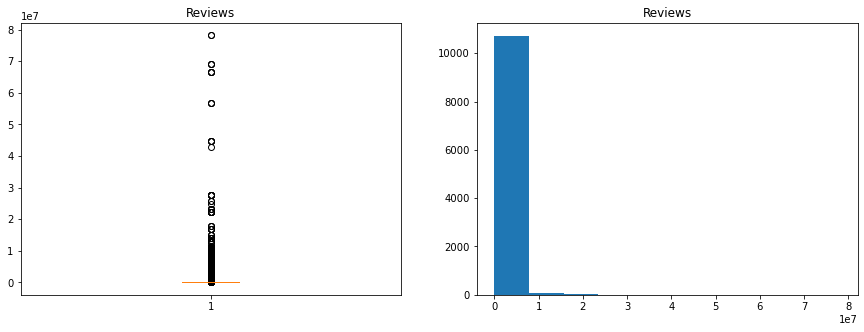

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(play["Reviews"])
plt.title('Reviews')

plt.subplot(1,2,2)
plt.hist(play["Reviews"])
plt.title('Reviews')
plt.show()

Size sütununda yer alan 'Varies with device' değişkenini nan yapalım ve ardından k/M leri temizleyerek dolduralım.

In [19]:
play['Size'].replace('Varies with device', np.nan, inplace = True ) 

In [20]:
play.Size = (play.Size.replace(r'[kM]', '', regex=True).astype(float) * \
             play.Size.str.extract(r'[\d\.]+([KM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))

In [21]:
play['Size'].fillna(play.groupby('Reviews')['Size'].transform('mean'),inplace = True)

In [22]:
play["Size"].unique()

array([1.90000000e+07, 1.40000000e+07, 8.70000000e+06, 2.50000000e+07,
       2.80000000e+06, 5.60000000e+06, 2.90000000e+07, 3.30000000e+07,
       3.10000000e+06, 2.80000000e+07, 1.20000000e+07, 2.00000000e+07,
       2.10000000e+07, 3.70000000e+07, 2.70000000e+06, 5.50000000e+06,
       1.70000000e+07, 3.90000000e+07, 3.10000000e+07, 4.20000000e+06,
       7.00000000e+06, 2.30000000e+07, 6.00000000e+06, 6.10000000e+06,
       4.60000000e+06, 9.20000000e+06, 5.20000000e+06, 1.10000000e+07,
       2.40000000e+07,            nan, 9.40000000e+06, 1.50000000e+07,
       1.00000000e+07, 1.20000000e+06, 2.60000000e+07, 8.00000000e+06,
       7.90000000e+06, 5.60000000e+07, 5.70000000e+07, 3.50000000e+07,
       5.40000000e+07, 2.01000000e+02, 3.60000000e+06, 5.70000000e+06,
       8.60000000e+06, 2.40000000e+06, 2.70000000e+07, 2.50000000e+06,
       1.60000000e+07, 3.40000000e+06, 8.90000000e+06, 3.90000000e+06,
       2.90000000e+06, 3.80000000e+07, 3.20000000e+07, 5.40000000e+06,
      

Rating sütununda yer alan boş yerleri dolduralım.

In [23]:
play['Rating'].fillna(play.groupby('Installs_grup')['Rating'].transform('mean'),inplace = True)
play['Rating']= play['Rating'].round(1)
play['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Price sütununda yer alan "$" işaretini kaldırarak float değerlere dönüştürelim.

In [24]:
play.Price=play.Price.replace('[$]', '', regex=True).astype(float)

In [25]:
null_degerler(play)

,yüzde,adet
Size,13.763838,1492
Current Ver,0.073801,8
Android Ver,0.018450,2
Type,0.009225,1
App,0.000000,0
Category,0.000000,0
Rating,0.000000,0
Reviews,0.000000,0
Installs,0.000000,0
Price,0.000000,0


In [26]:
play['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [27]:
play['Android Ver']=play['Android Ver'].replace('[and up]', '', regex=True)
play['Android Ver']=play['Android Ver'].replace('[Vrieswithevice]', '', regex=True)
play['Android Ver']=play['Android Ver'].replace('[W]', '', regex=True)
play['Android Ver']=play['Android Ver'].replace('[.]', 'z', regex=True)

play['Android Ver'].unique()

array(['4z0z3', '4z2', '4z4', '2z3', '3z0', '4z1', '4z0', '2z3z3', '',
       '2z2', '5z0', '6z0', '1z6', '1z5', '2z1', '7z0', '5z1', '4z3',
       '4z0z3-7z1z1', '2z0', '3z2', '7z1', '7z0-7z1z1', '8z0', '5z0-8z0',
       '3z1', '2z0z1', '4z1-7z1z1', nan, '5z0-6z0', '1z0', '2z2-7z1z1',
       '5z0-7z1z1'], dtype=object)

In [28]:
play['Android Ver'] =play['Android Ver'].str.extract(r'(^\w{3})')
play['Android Ver']=play['Android Ver'].replace('[z]', '.', regex=True)

play['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', nan, '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [29]:
print(*play['Current Ver'].unique())

1.0.0 2.0.0 1.2.4 Varies with device 1.1 1.0 6.1.61.1 2.9.2 2.8 1.0.4 1.0.15 3.8 1.2.3 nan 3.1 2.2.5 5.5.4 4.0 2.2.6.2 1.1.3 1.5 1.0.8 1.03 6.0 6.7.12.2018 1.2 2.20 1.1.0 1.6 2.1 1.0.9 1.3 1 2.0.1 1.46 1.6.1 11.0 3.0 1.7.1 2.5.1 1.0.1 2.493 1.9.1 1.7 2.20 Build 02 1.37 0.2.1 4.47.3 1.9.7 2.2.21 2.9 1.79 2.3.5.1 8.31 1.1.5.0 10.0.2 1.10.3 3.20.1 1.0.3 1.4 4.6.5 2.8.2 4.0.3 1.40 1.5.18 2.3.4 2.17 6.10.1 2.3.0 1.0.6 1.9 5.4 3.0.1 8.0 3.3.9 1.20 2.3.09 1.4.2 18.5 1.15 2.0 1.2.13 1.0.2.0 3.1.89 2.2.0 1.9.2 1.3.2 3.2.1 2.0.075 1.911805270 9.1.363 1.1.6 2.3.18 15.0 18.05.31+530 5.0.6 3.12 1.28 6.0.8 9.00.950462 14.0 3.05 2.5.3 7.0.4.6 3.1.7.9 3.9.1 3.4.2 2.19.0.204537701 9.7.14188 4.9.10 5.2.8 3.3 3.550.2 4.6.30 7.3.21 1.1.13 3.0.1.11 (Build 311) 5.1.5 2.3.6 4.1.28165.0716 99.0.0.35.75 12.2.4 1.0.6.8 3.4.5 2.5.6 1.12.5 4.9 0.9.4 1.1.07.6 1.0.5 1.2.6 3.9.2 3.4.49 1.5.2 3.4.6 1.12.0 1.7.14 3.24.1 18.7 3.19.005 4.9.1 6.1.2 6.4.4 3.7.5 2.6.158 5.20.7 4.3.0.508 10.46.2 11.1.0 1.2.287 3.0.4651 3.1.

1.9.1.147.0-google 4.4.0.4 2.15.2714 2.9.9 4.7 2.04.2714 2.10 2.03.2714 1.5.3.1807 1.1.27.477-free 3.7.1 FreeTimeApp-aosp_v3.14_Build-1.0.204367.0.13014 Natalia Studio Development 8.9 1.3.9 8.1.2 1.11.93 30 12.2.6.3660 v7.0.02.3.0516.1_06_0713 1.3.6 7.1.12.12 5.9.7 7.1.34.28 9.9.1.1910 1.3.A.2.9 3.18.5 2.9.10 1.8.4.5 8.50.935520 12.2.7.3671 4.1.11 - Hegoa 1.0.34 3.1.7 v1.0.3 17.6 1.78 9.7.6 1.251.54 7.10.621414 1.4.08.2 2.6.71 6.5.852058 1.137.22 9.51.755029 4.13.3 6.2.2.17136 1.32.1 6.6.4 2.71 5.17 8.2.9 5.2.5 5.8.0 8.3 3.1.6.9 5.2.0 4.2.2254.129147 6.7.3 9.1 8.0.6 4.11.0.611033 18.201.01 1.9.0 5.6.40 3.12.0 3.0.42 3.53.2 4.1.0.72 3.000.1 5.38 4.4.2.19 2.42.1.9 6.5.1725 6.19.5 3.5.13 3.4.4 5.9.1.1347176.a3ca6ab274 3.19.11 16.3 19.2.8 9.2.3 5.1.10 3.1.12 1.8.7.0 6.7.15.7 17.4.11 4.8.1 5.7 3.2.2 116 18.0.2 2.10.06 04.08.00 5.1.0 free 1.39 7.16.8 5.44.1 5.2.10 5.4 (30) 4.76 5.072.1830.2 9.3.3 8.10.1 1.2.1.49 6.5.2 8.6 1.3.13 5.4.4 4.0.4 3.0.11 0.81 beta 9.3.6 3.7.1a 1.16.2 1.9.8.0 1.19.1

1.3.22 1.8.4.7 0.0.53 1.2.5.4-11 2.2.1.5 2.0.15 0.24 2.1.3181 3.53 1.0.7.8 7.17.2.1 5.29.23 Domain 253 0.858 6.0.18 8.1.10.41 9.19.2 2.27 17.4 4.5.9 4.6.1404 v4.30.0.9 2.1.9f7 Android 3.0 - 2017 3.36 Android 2.0 - 2014 1.0404 41.0 2.4.1.485300 12.2 3rd Release Aug 2016 7.3.2 2.5a 1.9.19 8.7 23.01.1265.0712 4.0.7.0 0.15.2 0.7.1 4.6.71 2017.07.24 1.03.123.0713 1.0.0.96 1.022 15 1.25.4 2.8.6 3.20.001 1.3.81 1.74 1.9.734 1.72 6.04 1.5.447 1.0.612928 0.3.4 2.0.148.0


In [30]:
play['Current Ver']=play['Current Ver'].replace('[.]', 'z', regex=True)
play['Current Ver']=play['Current Ver'].str.extract(r'(^\w{3})')
play['Current Ver']=play['Current Ver'].replace('[z]', '.', regex=True)
play['Current Ver']=play['Current Ver'].replace('[_]', '.', regex=True)

play['Current Ver'].unique()

array(['1.0', '2.0', '1.2', 'Var', '1.1', '6.1', '2.9', '2.8', '3.8', nan,
       '3.1', '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6', '2.1',
       '1.3', '1.4', '11.', '3.0', '1.7', '2.5', '2.4', '1.9', '0.2',
       '4.4', '2.3', '8.3', '10.', '3.2', '4.6', '5.4', '8.0', '3.3',
       '18.', '9.1', '15.', '5.0', '9.0', '14.', '7.0', '3.9', '3.4',
       '9.7', '4.9', '5.2', '3.5', '7.3', '5.1', '4.1', '99.', '12.',
       '0.9', '6.4', '3.7', '2.6', '4.3', '6.3', '4.7', '4.2', '1.8',
       '37.', '9.8', '24.', '47.', 'R6.', '69.', '7.5', '9.9', '42.',
       '0.1', '7.7', '7.2', '6.5', '5.6', '4.5', '5.8', '196', '8.1',
       '201', '6.6', '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '20.',
       '5.7', '13.', '8.5', 'v1.', '01.', '16.', '8.4', 'Can', '6.8',
       '6.2', '2.7', '5.9', '7.8', '7.1', '7.9', 'p5.', '112', '8.8',
       'Pub', '7.4', '9.6', '220', '858', 'v3.', 'Ver', '02.', '9.4',
       '319', '542', '0.7', '0.5', '19.', '79.', '108', '57.', '149',
       '378', '

In [31]:
for deger in play['Current Ver']:
    try:
        float(deger)
    except:
        play['Current Ver'].replace(deger, np.nan, inplace = True ) 

In [32]:
play['Current Ver'].unique()

array(['1.0', '2.0', '1.2', nan, '1.1', '6.1', '2.9', '2.8', '3.8', '3.1',
       '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6', '2.1', '1.3',
       '1.4', '11.', '3.0', '1.7', '2.5', '2.4', '1.9', '0.2', '4.4',
       '2.3', '8.3', '10.', '3.2', '4.6', '5.4', '8.0', '3.3', '18.',
       '9.1', '15.', '5.0', '9.0', '14.', '7.0', '3.9', '3.4', '9.7',
       '4.9', '5.2', '3.5', '7.3', '5.1', '4.1', '99.', '12.', '0.9',
       '6.4', '3.7', '2.6', '4.3', '6.3', '4.7', '4.2', '1.8', '37.',
       '9.8', '24.', '47.', '69.', '7.5', '9.9', '42.', '0.1', '7.7',
       '7.2', '6.5', '5.6', '4.5', '5.8', '196', '8.1', '201', '6.6',
       '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '20.', '5.7', '13.',
       '8.5', '01.', '16.', '8.4', '6.8', '6.2', '2.7', '5.9', '7.8',
       '7.1', '7.9', '112', '8.8', '7.4', '9.6', '220', '858', '02.',
       '9.4', '319', '542', '0.7', '0.5', '19.', '79.', '108', '57.',
       '149', '378', '28.', '7.6', '25.', '300', '0.6', '43.', '50.',
       '27.', '

In [33]:
play.dropna(how ='any', inplace = True)
null_degerler(play)
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8835 entries, 0 to 10838
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8835 non-null   object 
 1   Category        8835 non-null   object 
 2   Rating          8835 non-null   float64
 3   Reviews         8835 non-null   int64  
 4   Size            8835 non-null   float64
 5   Installs        8835 non-null   int64  
 6   Type            8835 non-null   object 
 7   Price           8835 non-null   float64
 8   Content Rating  8835 non-null   object 
 9   Genres          8835 non-null   object 
 10  Last Updated    8835 non-null   object 
 11  Current Ver     8835 non-null   object 
 12  Android Ver     8835 non-null   object 
 13  Installs_grup   8835 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 759.3+ KB


In [34]:
play.describe()

,Rating,Reviews,Size,Installs,Price,Installs_grup
count,8835.000000,8.835000e+03,8.835000e+03,8.835000e+03,8835.000000,8835.000000
mean,4.178551,2.541732e+05,2.157957e+07,7.034094e+06,1.115763,1.027504
std,0.502314,1.744359e+06,2.263158e+07,4.602295e+07,16.602530,0.170337
min,1.000000,0.000000e+00,8.500000e+00,0.000000e+00,0.000000,1.000000
25%,4.100000,2.300000e+01,4.900000e+06,1.000000e+03,0.000000,1.000000
50%,4.200000,7.510000e+02,1.300000e+07,1.000000e+05,0.000000,1.000000
75%,4.500000,2.490650e+04,3.000000e+07,1.000000e+06,0.000000,1.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000,3.000000


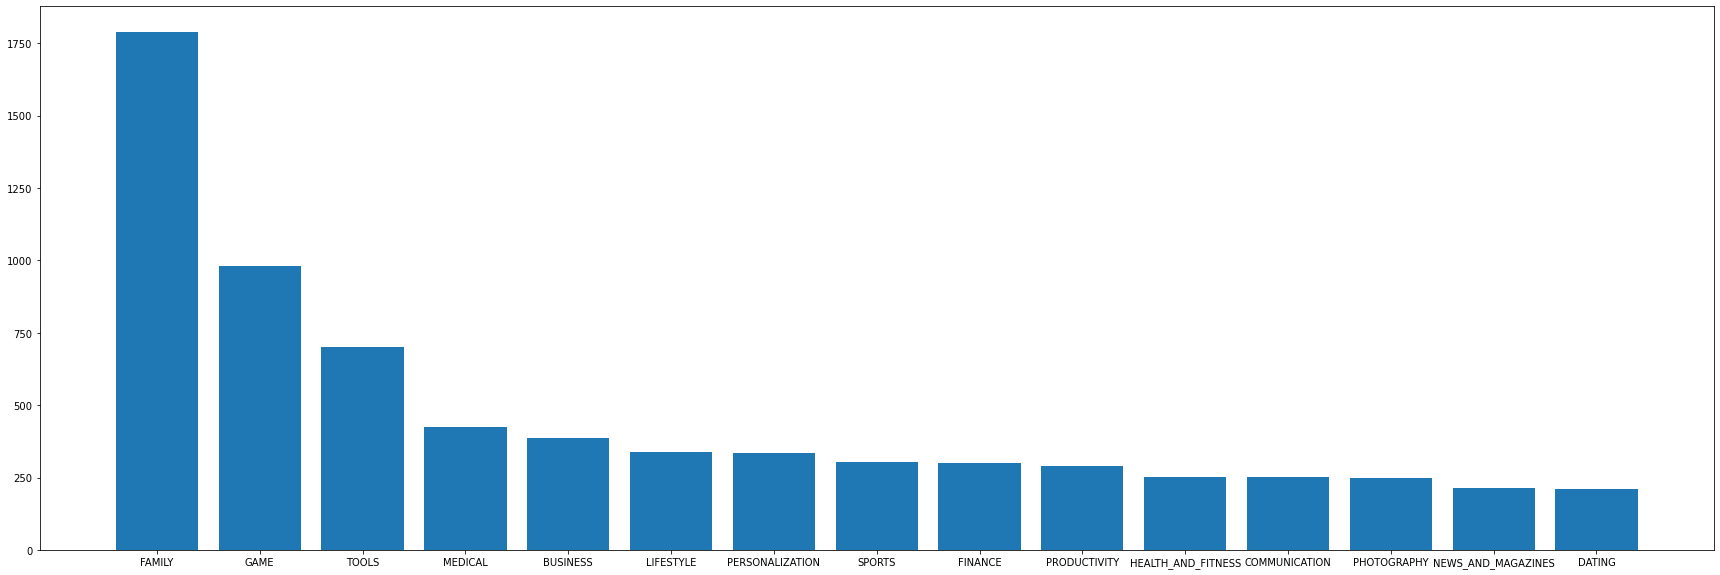

In [35]:
plt.figure(figsize=(30,10))
x=play['Category'].value_counts().index
y=play['Category'].value_counts().values

plt.bar(x[0:15],y[0:15])
plt.show()

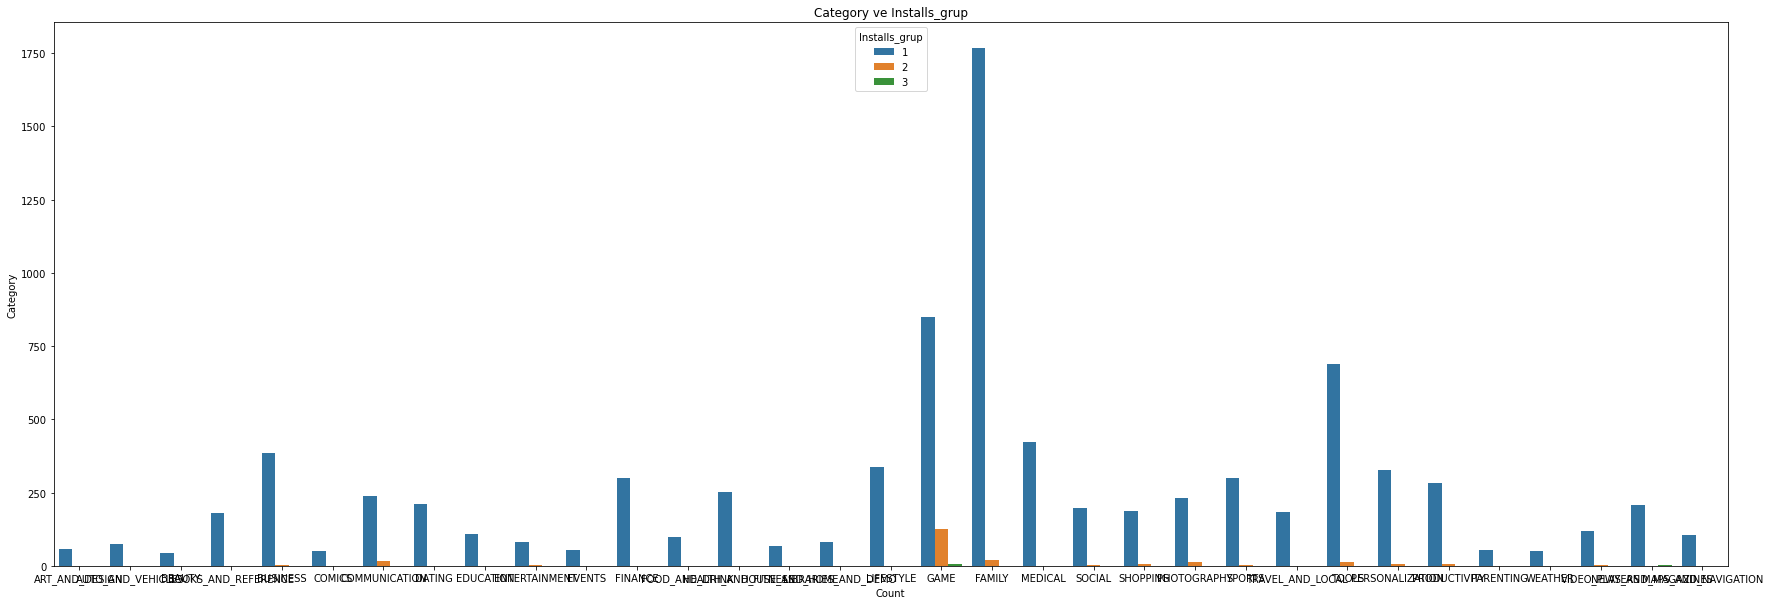

In [36]:
plt.figure(figsize=(30,10))

sns.countplot(x="Category", hue="Installs_grup", data=play)
plt.title("Category ve Installs_grup")
plt.ylabel("Category")
plt.xlabel("Count")
plt.show()

In [37]:
play.groupby('Category').mean()['Installs_grup']

Category
ART_AND_DESIGN         1.000000
AUTO_AND_VEHICLES      1.000000
BEAUTY                 1.000000
BOOKS_AND_REFERENCE    1.000000
BUSINESS               1.005181
COMICS                 1.000000
COMMUNICATION          1.063241
DATING                 1.000000
EDUCATION              1.000000
ENTERTAINMENT          1.023810
EVENTS                 1.000000
FAMILY                 1.011745
FINANCE                1.000000
FOOD_AND_DRINK         1.000000
GAME                   1.140673
HEALTH_AND_FITNESS     1.003953
HOUSE_AND_HOME         1.000000
LIBRARIES_AND_DEMO     1.000000
LIFESTYLE              1.002967
MAPS_AND_NAVIGATION    1.000000
MEDICAL                1.000000
NEWS_AND_MAGAZINES     1.037559
PARENTING              1.000000
PERSONALIZATION        1.015015
PHOTOGRAPHY            1.056680
PRODUCTIVITY           1.024221
SHOPPING               1.041237
SOCIAL                 1.009950
SPORTS                 1.013115
TOOLS                  1.017094
TRAVEL_AND_LOCAL       1.000000

In [38]:
ttest_ind(play[play.Category == "FAMILY"][["Installs_grup"]],
          play[play.Category == "GAME"][["Installs_grup"]])

Ttest_indResult(statistic=array([-13.87491691]), pvalue=array([2.28264532e-42]))

Uygulamanın ücretli olup olmamasının indirilme üzerinde bir etkisi olup olmadığına bakalım.

In [39]:
play.groupby("Type").mean()[["Installs_grup"]]

,Installs_grup
Type,
Free,1.029809
Paid,1.000000


In [40]:
ttest_ind(play[play.Type == "Free"][["Installs_grup"]],
          play[play.Type == "Paid"][["Installs_grup"]])

Ttest_indResult(statistic=array([4.39766393]), pvalue=array([1.10703789e-05]))

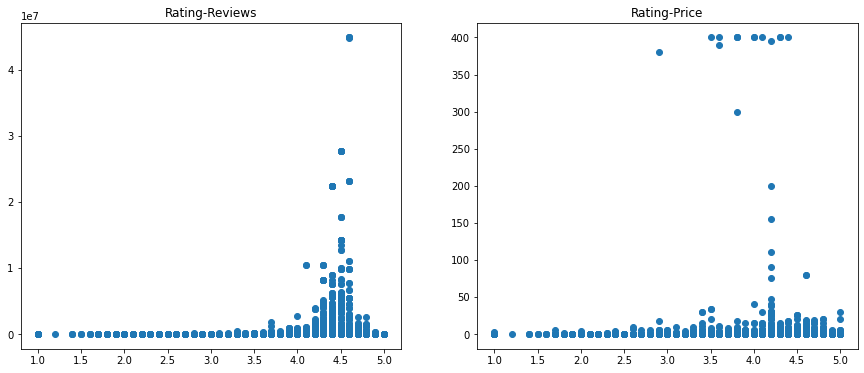

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.scatter(play.Rating, play.Reviews)
plt.title("Rating-Reviews")
plt.subplot(122)
plt.scatter(play.Rating, play.Price)
plt.title("Rating-Price")

plt.show()

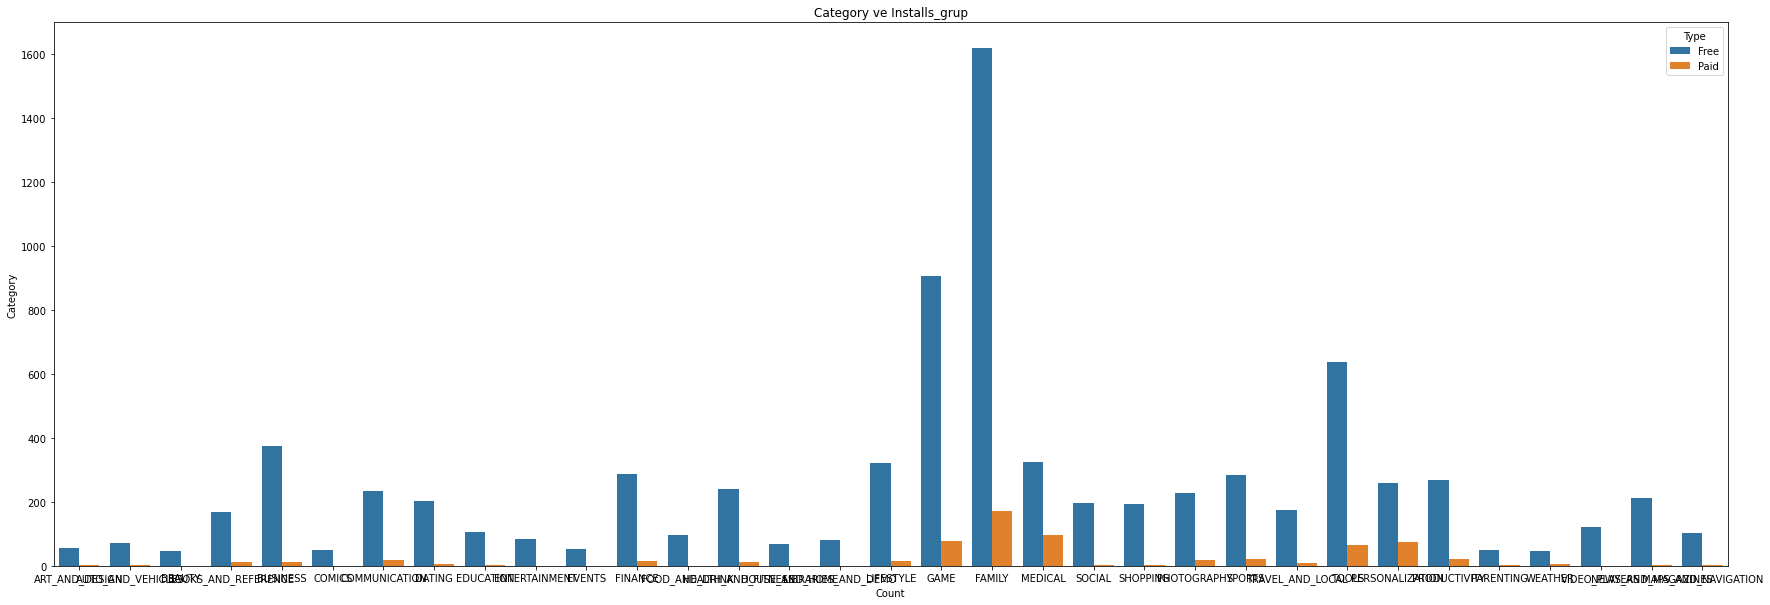

In [42]:
plt.figure(figsize=(30,10))

sns.countplot(x="Category", hue="Type", data=play)
plt.title("Category ve Installs_grup")
plt.ylabel("Category")
plt.xlabel("Count")
plt.show()

Text(0.5, 1.0, 'Korelasyon Matrisi (PLAY)')

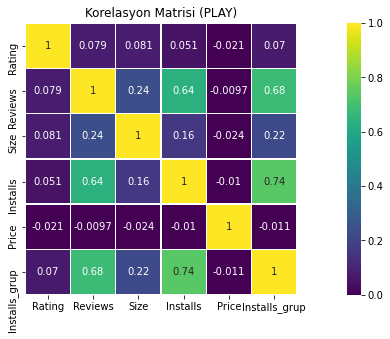

In [43]:
plt.figure(figsize=(18,5))

korelasyon_mat_play=play.corr()

sns.heatmap(korelasyon_mat_play, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (PLAY)")

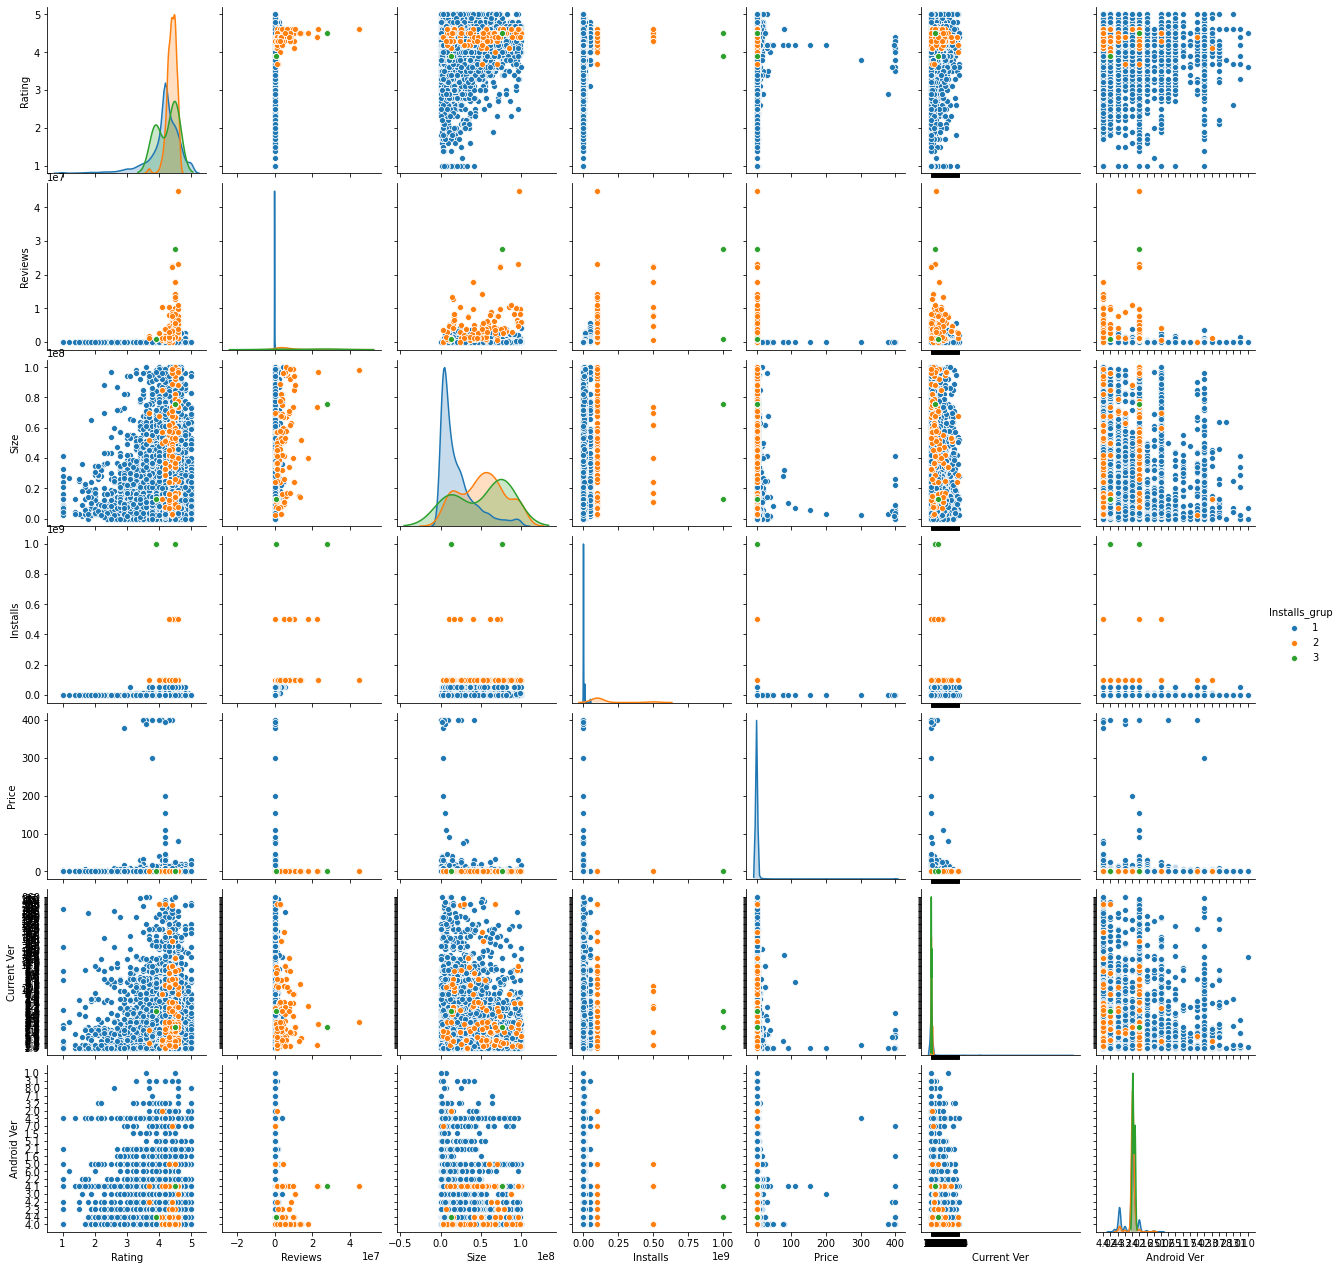

In [44]:
sns.pairplot(play,hue='Installs_grup')
plt.show()

In [45]:
play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8835 entries, 0 to 10838
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8835 non-null   object 
 1   Category        8835 non-null   object 
 2   Rating          8835 non-null   float64
 3   Reviews         8835 non-null   int64  
 4   Size            8835 non-null   float64
 5   Installs        8835 non-null   int64  
 6   Type            8835 non-null   object 
 7   Price           8835 non-null   float64
 8   Content Rating  8835 non-null   object 
 9   Genres          8835 non-null   object 
 10  Last Updated    8835 non-null   object 
 11  Current Ver     8835 non-null   object 
 12  Android Ver     8835 non-null   object 
 13  Installs_grup   8835 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 1015.3+ KB


In [46]:
play.describe()

,Rating,Reviews,Size,Installs,Price,Installs_grup
count,8835.000000,8.835000e+03,8.835000e+03,8.835000e+03,8835.000000,8835.000000
mean,4.178551,2.541732e+05,2.157957e+07,7.034094e+06,1.115763,1.027504
std,0.502314,1.744359e+06,2.263158e+07,4.602295e+07,16.602530,0.170337
min,1.000000,0.000000e+00,8.500000e+00,0.000000e+00,0.000000,1.000000
25%,4.100000,2.300000e+01,4.900000e+06,1.000000e+03,0.000000,1.000000
50%,4.200000,7.510000e+02,1.300000e+07,1.000000e+05,0.000000,1.000000
75%,4.500000,2.490650e+04,3.000000e+07,1.000000e+06,0.000000,1.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000,3.000000
